# Classification with Random Forest, Logistic Regression, and SVM Based on Genres

Let's import necessary libraries and load the dataset. 

In [28]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()  # for plot styling

In [15]:
input_data_path = "features_msd_lda_sp.csv"
dataset = pd.read_csv(input_data_path)
dataset.drop(["Unnamed: 0"], 1, inplace=True)


Let's look at which genres are in dataset.

In [16]:
dataset.columns

Index(['genre', 'track_id', 'artist_name', 'title', 'loudness_x', 'tempo_x',
       'time_signature', 'key_x', 'mode_x', 'duration', 'avg_timbre1',
       'avg_timbre2', 'avg_timbre3', 'avg_timbre4', 'avg_timbre5',
       'avg_timbre6', 'avg_timbre7', 'avg_timbre8', 'avg_timbre9',
       'avg_timbre10', 'avg_timbre11', 'avg_timbre12', 'var_timbre1',
       'var_timbre2', 'var_timbre3', 'var_timbre4', 'var_timbre5',
       'var_timbre6', 'var_timbre7', 'var_timbre8', 'var_timbre9',
       'var_timbre10', 'var_timbre11', 'var_timbre12', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', 'danceability', 'energy', 'key_y',
       'loudness_y', 'mode_y', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo_y', 'id'],
      dtype='object')

In [18]:
genres = dataset.genre.unique()
genres
dataset.genre.value_counts()

classic pop and rock     5772
folk                     2370
soul and reggae           796
metal                     780
punk                      660
pop                       523
dance and electronica     417
jazz and blues            258
hip-hop                    64
classical                  27
Name: genre, dtype: int64

Since we cannot use string features in random forest, we're gonna drop corresponding columns

In [19]:
string_features = ["track_id", "id", "artist_name", "title"]

Let's define a function for dividing data into input and output for binary classification

In [20]:
def create_input_and_label_for_genre(dataset, genre):
    label = np.where(dataset['genre']==genre, 1, 0)
    feature = dataset.loc[:, dataset.columns != 'genre']
    feature.drop(string_features, 1, inplace = True)
    return feature.as_matrix(), label

Now it's time to create RandomForestClassifier

In [21]:
def get_random_forest_classifier(n_features):
    return RandomForestClassifier(max_depth=n_features, random_state=0)

In [22]:
def get_logistic_regression():
    return LogisticRegression()

In [23]:
def get_SVC():
    return SVC()

In [24]:
def get_LinearSVC():
    return LinearSVC()

Below we are gonna make binary classification with random forest for each genre in dataset

In [12]:
def classification_with_different_classifiers(X_train, X_test, y_train, y_test, clf, clf_name):
#     global train_acc_list
#     global test_acc_list
#     global cv_acc_list
    clf.fit(X_train, y_train)
    #print("Feature importance", clf.feature_importances_)
    cv = 10
    cross_validation_scores = cross_val_score(clf, X, y, cv=cv)
    #print("Cross validation scores", cross_validation_scores)
    mean_cvs = sum(cross_validation_scores)/len(cross_validation_scores)
    predictions = clf.predict(X_test)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, predictions)
    if clf_name in train_acc_list:
        train_acc_list[clf_name].append(train_acc)
    else:
        train_acc_list[clf_name] = [train_acc]
    if clf_name in test_acc_list:
        test_acc_list[clf_name].append(test_acc)
    else:
        test_acc_list[clf_name] = [test_acc]
    if clf_name in cv_acc_list:
        cv_acc_list[clf_name].append(mean_cvs)
    else:
        cv_acc_list[clf_name] = [mean_cvs]
    print("Train Accuracy :: ", train_acc)
    print("Cross validation Accuraccy :: ", mean_cvs)
    print("Test Accuracy  :: ", test_acc)

In [26]:
classifier_names = ["Random Forest multiclass", "Random Forest One Vs All", "Logistic Regression multiclass", "Logistic Regression One Vs All", "SVM", "Linear SVM"]

In [ ]:
train_acc_list = {}
test_acc_list = {}
cv_acc_list = {}
for genre in genres:
    X, y = create_input_and_label_for_genre(dataset.copy(), genre)
    #onevsallRF = OneVsRestClassifier(RandomForestClassifier(max_depth=X.shape[1], random_state=0))
    RF = get_random_forest_classifier(X.shape[1])
    LR = get_logistic_regression()
    svc = get_SVC()
    linearSVC = get_LinearSVC()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("Binary classification based on genre: "+ genre)
    print()
    for classifier, classifier_name in zip([RF, LR, svc, linearSVC], ["Random Forest", "Logistic Regression", "SVC", "Linear SVC"]):
        print ('Results for ' + classifier_name)
        classification_with_different_classifiers(X_train, X_test, y_train, y_test, classifier, classifier_name)
        print ('-------------------------')
for classifier_name in classifier_names:
    overall_train_acc = sum(train_acc_list)/len(train_acc_list)
    overall_test_acc = sum(test_acc_list)/len(test_acc_list)
    overall_cv_acc = sum(cv_acc_list)/len(cv_acc_list)
    print("Overall results for " + classifier_name)    
    print("Train Accuracy :: ", overall_train_acc[classifier_name])
    print("Test Accuracy  :: ", overall_test_acc[classifier_name])
    print("CV Accuracy    :: ", overall_cv_acc[classifier_name])

/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Binary classification based on genre: classic pop and rock

Results for Random Forest
Train Accuracy ::  0.986971428571
Cross validation Accuraccy ::  0.613696075591
Test Accuracy  ::  0.673980116558
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.706628571429
Cross validation Accuraccy ::  0.657847862063
Test Accuracy  ::  0.709290366815
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.505271247216
Test Accuracy  ::  0.496057593418
-------------------------
Results for Linear SVC
Train Accuracy ::  0.541257142857
Cross validation Accuraccy ::  0.531159417926
Test Accuracy  ::  0.542680836476
-------------------------
Binary classification based on genre: punk

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.996685714286
Cross validation Accuraccy ::  0.925755591517
Test Accuracy  ::  0.95783339047
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.963885714286
Cross validation Accuraccy ::  0.927809501132
Test Accuracy  ::  0.958176208433
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.943430178979
Test Accuracy  ::  0.942063764141
-------------------------
Results for Linear SVC
Train Accuracy ::  0.949485714286
Cross validation Accuraccy ::  0.893453254963
Test Accuracy  ::  0.948920123414
-------------------------
Binary classification based on genre: folk

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.9872
Cross validation Accuraccy ::  0.808695457265
Test Accuracy  ::  0.826876928351
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.833142857143
Cross validation Accuraccy ::  0.824638610973
Test Accuracy  ::  0.842303736716
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.796862915423
Test Accuracy  ::  0.809393212204
-------------------------
Results for Linear SVC
Train Accuracy ::  0.800685714286
Cross validation Accuraccy ::  0.707574214277
Test Accuracy  ::  0.816935207405
-------------------------
Binary classification based on genre: pop

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.996571428571
Cross validation Accuraccy ::  0.964603406782
Test Accuracy  ::  0.970517655125
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.969371428571
Cross validation Accuraccy ::  0.952682162157
Test Accuracy  ::  0.964346931779
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.955172969037
Test Accuracy  ::  0.952348303051
-------------------------
Results for Linear SVC
Train Accuracy ::  0.956114285714
Cross validation Accuraccy ::  0.953202028947
Test Accuracy  ::  0.952348303051
-------------------------


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Binary classification based on genre: dance and electronica

Results for Random Forest
Train Accuracy ::  0.993828571429
Cross validation Accuraccy ::  0.964857921015
Test Accuracy  ::  0.966746657525
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.965485714286
Cross validation Accuraccy ::  0.963828688005
Test Accuracy  ::  0.968460747343
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.964258312866
Test Accuracy  ::  0.966403839561
-------------------------
Results for Linear SVC
Train Accuracy ::  0.961371428571
Cross validation Accuraccy ::  0.964600925097
Test Accuracy  ::  0.962632841961
-------------------------
Binary classification based on genre: metal

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.9968
Cross validation Accuraccy ::  0.960229495812
Test Accuracy  ::  0.967775111416
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.978514285714
Cross validation Accuraccy ::  0.969916118061
Test Accuracy  ::  0.976002742544
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.933144756975
Test Accuracy  ::  0.93075077134
-------------------------
Results for Linear SVC
Train Accuracy ::  0.970171428571
Cross validation Accuraccy ::  0.928001825501
Test Accuracy  ::  0.972231744943
-------------------------
Binary classification based on genre: jazz and blues

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.994514285714
Cross validation Accuraccy ::  0.977886515914
Test Accuracy  ::  0.978402468289
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.977371428571
Cross validation Accuraccy ::  0.97728639308
Test Accuracy  ::  0.978745286253
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.977886515914
Test Accuracy  ::  0.978402468289
-------------------------
Results for Linear SVC
Train Accuracy ::  0.9776
Cross validation Accuraccy ::  0.882513471058
Test Accuracy  ::  0.978402468289
-------------------------
Binary classification based on genre: classical

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.999657142857
Cross validation Accuraccy ::  0.997685934379
Test Accuracy  ::  0.997943092218
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.998285714286
Cross validation Accuraccy ::  0.996742611643
Test Accuracy  ::  0.997943092218
-------------------------
Results for SVC
Train Accuracy ::  1.0
Cross validation Accuraccy ::  0.997685934379
Test Accuracy  ::  0.997943092218
-------------------------
Results for Linear SVC
Train Accuracy ::  0.997485714286
Cross validation Accuraccy ::  0.997343101677
Test Accuracy  ::  0.997943092218
-------------------------
Binary classification based on genre: hip-hop

Results for Random Forest


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.998857142857
Cross validation Accuraccy ::  0.994772037495
Test Accuracy  ::  0.995200548509
-------------------------
Results for Logistic Regression
Train Accuracy ::  0.995771428571
Cross validation Accuraccy ::  0.992799334768
Test Accuracy  ::  0.995886184436
-------------------------
Results for SVC


Now we're gonna create a function for dividing data into input and output for multiclass classification

In [8]:
def create_input_and_label_for_multiclass(dataset, genres):
    label = dataset[['genre']]
    for index, genre in zip(range(0, len(genres)),genres):
        label.loc[dataset['genre'] == genre, 'genre'] = index 
    feature = dataset.loc[:, dataset.columns != 'genre']
    feature.drop(string_features, 1, inplace = True)
    return feature.as_matrix(), label['genre']

Below, we're gonna get results for multiclass classification with Random Forest Classifier

In [9]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(predictions, label, predict_names, label_names):
    mat = confusion_matrix(predictions, label)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=predict_names,
            yticklabels=label_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    return plt

In [13]:
def classify(X_train, y_train, X_test, y_test, classifier, classifier_name):
    cv = 10
    classifier.fit(X_train, y_train)
    cross_validation_scores = cross_val_score(classifier, X, y, cv=cv)
    mean_cvs = sum(cross_validation_scores)/len(cross_validation_scores)
    predictions = classifier.predict(X_test)
    train_acc = accuracy_score(y_train, classifier.predict(X_train))
    test_acc = accuracy_score(y_test, predictions)
    print("Results for classifier\t: " + classifier_name)
    print("Train Accuracy\t\t\t:: ", train_acc)
    print("Cross validation Accuracy\t:: ", mean_cvs)
    print("Test Accuracy\t\t\t:: ", test_acc)
    conf_mat = plot_confusion_matrix(predictions, y_test, genres, genres)
    conf_mat.show()

/media/gokce/Data/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Results for classifier	: Random Forest multiclass
Train Accuracy			::  0.992571428571
Cross validation Accuracy	::  0.608942226144
Test Accuracy			::  0.63764141241


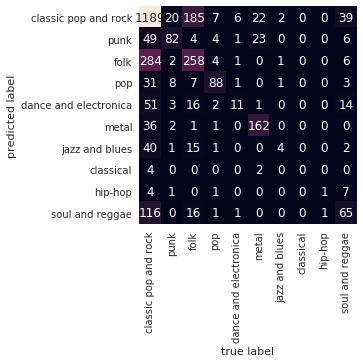

Results for classifier	: Random Forest One Vs All
Train Accuracy			::  0.984228571429
Cross validation Accuracy	::  0.598034750007
Test Accuracy			::  0.636612958519


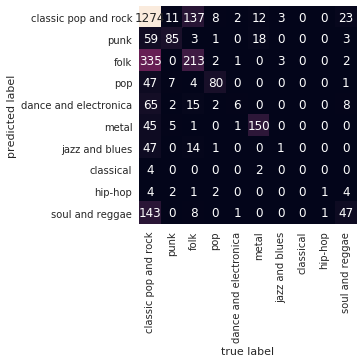

Results for classifier	: Logistic Regression multiclass
Train Accuracy			::  0.661828571429
Cross validation Accuracy	::  0.642447457515
Test Accuracy			::  0.671237572849


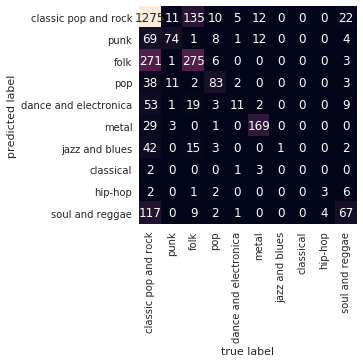

Results for classifier	: Logistic Regression One Vs All
Train Accuracy			::  0.6632
Cross validation Accuracy	::  0.640646272809
Test Accuracy			::  0.668837847103


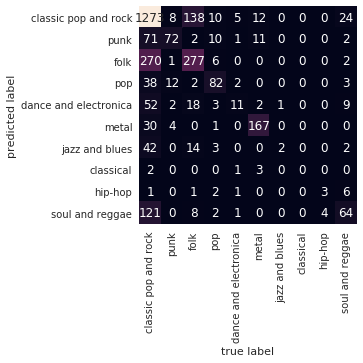

Results for classifier	: SVM
Train Accuracy			::  1.0
Cross validation Accuracy	::  0.494730568573
Test Accuracy			::  0.503942406582


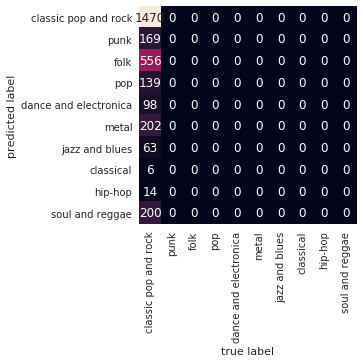

Results for classifier	: Linear SVM
Train Accuracy			::  0.4008
Cross validation Accuracy	::  0.451654824359
Test Accuracy			::  0.397668837847


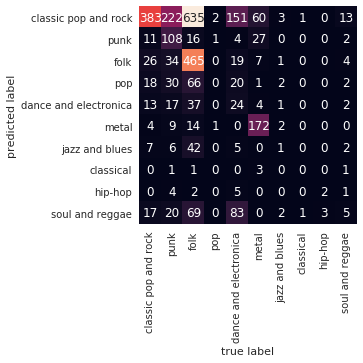

In [16]:
X, y = create_input_and_label_for_multiclass(dataset.copy(), genres)

onevsallRF = OneVsRestClassifier(RandomForestClassifier(max_depth=X.shape[1], random_state=0))
multiclassRF = get_random_forest_classifier(X.shape[1])
onevsallLR = OneVsRestClassifier(LogisticRegression())
multiclassLR = get_logistic_regression()
svc = get_SVC()
linearSVC = get_LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#cross_val_score_multiclass = cross_val_score(multiclass X, y, cv=cv)
#cross_val_score_onevsall = cross_val_score(onevsall, X, y, cv=cv)
for classifier, classifier_name in zip([onevsallRF, multiclassRF, onevsallLR, multiclassLR, svc, linearSVC], classifier_names):
    classify(X_train, y_train, X_test, y_test, classifier, classifier_name)

In [29]:
X, y = create_input_and_label_for_multiclass(dataset.copy(), genres)
multiclassLR = get_logistic_regression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multiclassLR.fit(X_train, y_train)
with open('classifier', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(multiclassLR, f, pickle.HIGHEST_PROTOCOL)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea